## Regression

### Predicting exam score : regression


| x (Hours)  | y (score) |
|    :---:   |   :---:   |
|    10      |     90    |
|     9      |     80    |
|     3      |     50    |
|     2      |     30    |


#### Regression - data

| x  | y |
|    :---:   |   :---:   |
|   1     |   1   |
|   2      |   2   |
|   3     |    3    |


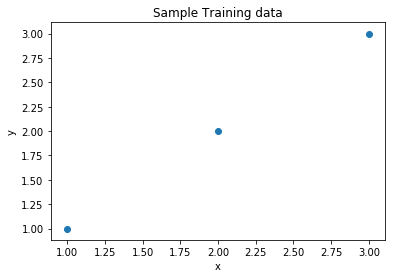

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3])
y = np.array([1,2,3])
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample Training data")
plt.show()

### (Linear) Hypothesis


$$ H(x) = W x + b $$

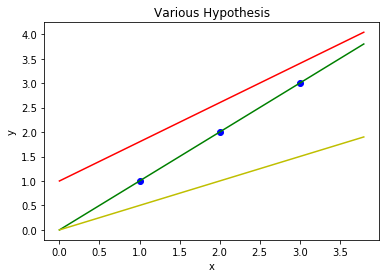

In [23]:
x1 = np.arange(0,4,0.2)
y1 = 0.8*x1 + 1.
y2 =   1*x1 + 0.
y3 = 0.5*x1 + 0.
plt.plot(x1,y1,c="r")
plt.plot(x1,y2,c="g")
plt.plot(x1,y3,c="y")

plt.scatter(x,y,c="b")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Various Hypothesis")
plt.show()

## Cost function  - Which hypothesis is better ?
* How fit the line to our (trainging) data

$$ { (H(x^{(1)})-y^{(1)})^2 +(H(x^{(2)})-y^{(2)})^2 +(H(x^{(3)})-y^{(3)})^2 \over 3 }$$

$$ \text{cost} = { 1 \over m} \sum_{i=1}^m (H(x^{(i)})-y^{(i)})^2 $$

Substitute $$ H(x) = Wx + b$$

$$ \text{cost}(W,b) = {1 \over m} \sum_{i=1}^m (Wx^{(i)} + b -y^{(i)})^2 $$

$$ \min\limits_{W,b} \text{cost}(W,b) $$

## Lab 02 =================

### Hypothesis and cost function

$$ H(x) = Wx + b$$

$$ \text{cost} = { 1 \over m} \sum_{i=1}^m (H(x^{(i)})-y^{(i)})^2 $$
where $y^{(i)}$ is true output

$$ \text{cost}(W,b) = {1 \over m} \sum_{i=1}^m (Wx^{(i)} + b -y^{(i)})^2 $$


1) Build graph using TF operations

$$ H(x) = Wx + b$$

In [7]:
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our Hypothesis xW + b
hypothesis = x_train * W + b

$$ \text{cost} = { 1 \over m} \sum_{i=1}^m (H(x^{(i)})-y^{(i)})^2 $$

In [8]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

GradientScent

In [9]:
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

2) & 3) Run/Update graph and get results

In [11]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(1000):
    sess.run(train)
    if step % 100 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 48.21082 [-1.7778983] [-1.0066987]
100 0.0028847773 [0.93759793] [0.14179724]
200 0.0017826179 [0.95096284] [0.11147294]
300 0.0011015517 [0.9614523] [0.08762799]
400 0.0006806939 [0.96969795] [0.06888366]
500 0.00042062777 [0.97617984] [0.05414878]
600 0.00025992005 [0.98127526] [0.04256582]
700 0.00016061454 [0.98528063] [0.03346062]
800 9.924976e-05 [0.98842925] [0.02630304]
900 6.132902e-05 [0.99090445] [0.0206765]


### Using Placeholders

In [14]:
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], 
                                         feed_dict={X:[1,2,3,4,5], Y:[2.2,3.1,4.1,5.1,6.1]})
    if step % 100 == 0:
        print(step, cost_val, W_val, b_val)

0 32.846474 [-0.3809688] [1.331686]
100 0.023240173 [0.883074] [1.5299337]
200 0.012198852 [0.910919] [1.4294041]
300 0.006590286 [0.9307646] [1.3577552]
400 0.0037412706 [0.944909] [1.3066896]
500 0.0022940824 [0.9549899] [1.2702943]
600 0.0015589542 [0.9621748] [1.2443547]
700 0.001185523 [0.96729565] [1.2258666]
800 0.0009958284 [0.97094524] [1.2126904]
900 0.00089948205 [0.97354645] [1.2032992]
1000 0.00085053965 [0.97540045] [1.1966057]
1100 0.0008256665 [0.9767219] [1.191835]
1200 0.0008130333 [0.9776635] [1.1884353]
1300 0.00080662983 [0.9783348] [1.186012]
1400 0.00080336706 [0.9788131] [1.184285]
1500 0.0008017078 [0.979154] [1.1830541]
1600 0.00080087053 [0.97939706] [1.1821767]
1700 0.0008004395 [0.97957027] [1.1815515]
1800 0.0008002302 [0.9796937] [1.1811057]
1900 0.0008001161 [0.9797816] [1.1807882]


In [18]:
# Prediction
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

[6.0797825]
[3.6301734]
[2.6503298 4.6100173]
